# Zscore 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [98]:
df=pd.read_csv('csv/placement.csv')
data=pd.read_csv('csv/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\moury\AppData\Local\Temp\ipykernel_25244\2849990712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cgpa)
C:\Users\moury\AppData\Local\Temp\ipykernel_25244\2849990712.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.placement_exam_marks)


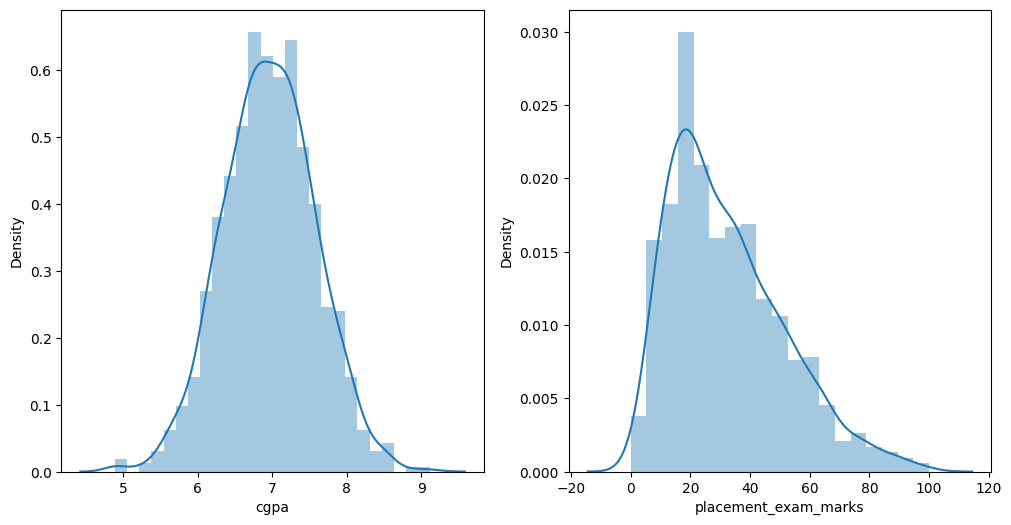

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.cgpa)
plt.subplot(1,2,2)
sns.distplot(df.placement_exam_marks)
plt.show()

In [100]:
df.cgpa.describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [101]:
df['cgpa'].mean()-3*df['cgpa'].std(),df['cgpa'].mean()+3*df['cgpa'].std()

(np.float64(5.113546374602832), np.float64(8.808933625397168))

In [102]:
df[(df['cgpa']<5.11)| (df['cgpa']> 8.8)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [103]:
new_df=df[(df['cgpa']>5.11)&(df['cgpa']< 8.8)]

In [104]:
new_df.shape

(995, 3)

In [105]:
#Aproce 2

df['zcgpa']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [106]:
df.head()

,cgpa,placement_exam_marks,placed,zcgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [107]:
df['zcgpa'].describe()

count    1.000000e+03
mean    -1.465494e-16
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: zcgpa, dtype: float64

In [108]:
df[(df['zcgpa']>3) | (df['zcgpa']<-3)]

,cgpa,placement_exam_marks,placed,zcgpa
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [109]:
new_df=df[(df['zcgpa']<3) | (df['zcgpa']>-3)]
new_df.head()

,cgpa,placement_exam_marks,placed,zcgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


## Capping

In [110]:
df2=df

In [111]:
upper_limit,lower_limit=df2['cgpa'].mean()-3*df2['cgpa'].std(),df2['cgpa'].mean()+3*df2['cgpa'].std()
upper_limit,lower_limit

(np.float64(5.113546374602832), np.float64(8.808933625397168))

In [112]:
#df2[]=np.where(condition,true  stmt,false stmt)
df2['cgpa']=np.where(
    df2['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df2['cgpa']<lower_limit,
        lower_limit,
        df2['cgpa']
    )
)

In [113]:
df2.shape

(1000, 4)

In [114]:
data.describe(),df2.describe()

(              cgpa  placement_exam_marks       placed
 count  1000.000000           1000.000000  1000.000000
 mean      6.961240             32.225000     0.489000
 std       0.615898             19.130822     0.500129
 min       4.890000              0.000000     0.000000
 25%       6.550000             17.000000     0.000000
 50%       6.960000             28.000000     0.000000
 75%       7.370000             44.000000     1.000000
 max       9.120000            100.000000     1.000000,
               cgpa  placement_exam_marks       placed         zcgpa
 count  1000.000000           1000.000000  1000.000000  1.000000e+03
 mean      5.124633             32.225000     0.489000 -1.465494e-16
 std       0.202202             19.130822     0.500129  1.000000e+00
 min       5.113546              0.000000     0.000000 -3.362960e+00
 25%       5.113546             17.000000     0.000000 -6.677081e-01
 50%       5.113546             28.000000     0.000000 -2.013321e-03
 75%       5.113546  